### Logistic Regression

Logistic Regression was used in the biological sciences in early twentieth century.<br> It was then used in many social science applications.<br> Logistic Regression is used when the dependent variable(target) is categorical.<br>
For example,<br>
To predict whether an email is spam (1) or (0)<br>
Whether the tumor is malignant (1) or not (0)<br>

Types of Logistic Regression<br><br>
<b>1. Binary Logistic Regression</b><br>
The categorical response has only two 2 possible outcomes. Example: Spam or Not<br><br>
<b>2. Multinomial Logistic Regression</b><br>
Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)<br><br>
<b>3. Ordinal Logistic Regression</b><br>
Three or more categories with ordering. Example: Movie rating from 1 to 5<br><br>

In this notebook we are talking only about <b>Binary Logistic Regression.</b>

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
# %matplotlib notebook

### Heart Disease Dataset :<br>
<b>Attribute Information:</b>
<ol>
    <li>age</li> 
    <li>sex</li>
    <li>chest pain type (4 values)</li>
    <li>resting blood pressure</li>
    <li>serum cholestoral in mg/dl</li>
    <li>fasting blood sugar > 120 mg/dl</li>
    <li>resting electrocardiographic results (values 0,1,2),</li>
    <li>maximum heart rate achieved</li>
    <li>exercise induced angina</li>
    <li>oldpeak = ST depression induced by exercise relative to rest</li>
    <li>the slope of the peak exercise ST segment</li>
    <li>number of major vessels (0-3) colored by flourosopy</li>
    <li>thal: 3 = normal; 6 = fixed defect; 7 = reversable defect</li>
</ol>

<a href='https://www.kaggle.com/ronitf/heart-disease-uci'>Heart Disease Dataset Link </a>

![title](1.jpg)

Read Full Paper <a href = 'https://www.ijrte.org/wp-content/uploads/papers/v8i2S3/B11630782S319.pdf'>Here</a>

#### Why you want to apply classification on selected dataset? Discuss full story behind dataset.
In this dataset we have some parameters like age , sex , chest pain type and etc. and finally we have a target which is tell us weather a person has a heart disease or not.From all this parameters we have to predict weather person has a heart disease or not i.e we have to predict 0 ( No heart Disease) or 1 ( Yes heart Disease ). So it is a classification problem we have to classify the categoris and that's why we apply classification algorithms on this dataset.<br><br>
Generally for two categories we called it <b>Binary classification.</b><br>
For more than two categories we called it <b>Multiclass classification</b><br>

In [92]:
dataset = pd.read_csv("heart_disease_data.csv")

In [93]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### How many total observations in data?
There are total 303 non-null values in dataset.

#### How many independent variables?
There are 12 independent variable in this dataset.<br>
<ul>
    <li>age</li> 
    <li>sex</li>
    <li>cp</li>
    <li>trestbps</li>
    <li>chol</li>
    <li>fbs  </li>
    <li>restecg</li>
    <li>thalach</li>
    <li>exang </li>
    <li>oldpeak</li>
    <li>slope</li>
    <li>ca</li>
    <li>thal</li>
</ul>

#### Which is dependent variable?
' target ' is dependent variable and that we have to predict.

#### Heart Disease Dataset :<br>
<b>Attribute Information:</b>
<ol>
    <li>age</li> 
    <li>sex</li>
    <li>chest pain type (4 values)</li>
    <li>resting blood pressure</li>
    <li>serum cholestoral in mg/dl</li>
    <li>fasting blood sugar > 120 mg/dl</li>
    <li>resting electrocardiographic results (values 0,1,2),</li>
    <li>maximum heart rate achieved</li>
    <li>exercise induced angina</li>
    <li>oldpeak = ST depression induced by exercise relative to rest</li>
    <li>the slope of the peak exercise ST segment</li>
    <li>number of major vessels (0-3) colored by flourosopy</li>
    <li>thal: 3 = normal; 6 = fixed defect; 7 = reversable defect</li>
</ol>

In [95]:
import seaborn as sns

Text(0.5, 9.444444444444438, 'maximum heart rate achieved')

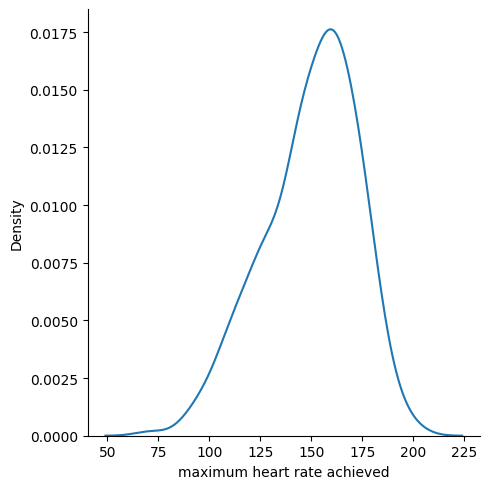

In [96]:
sns.displot(dataset["thalach"], kind="kde")
plt.xlabel("maximum heart rate achieved")

In [97]:
dataset["thal"].value_counts()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

##### Categorical Values
sex<br>
cp<br>
exang<br>
restecg<br>
slope<br>
ca<br>
thal<br>

In [98]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [99]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [100]:
categorized_sex = pd.get_dummies(dataset["sex"])  # caterogies encoder

In [101]:
categorized_sex.columns = ["female", "male"]

In [102]:
categorized_data = pd.get_dummies(
    data=dataset,
    columns=["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"],
    drop_first=True,
)

### Model prepration

for this time we take all the variables and check accuracy. And We make this model as the base model

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [104]:
sc = StandardScaler()
targets = categorized_data["target_1"]

In [105]:
X = categorized_data.drop(columns=["target_1"])

In [106]:
new_X = sc.fit_transform(X)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    new_X, targets, test_size=0.2, random_state=0
)

In [108]:
model = LogisticRegression()

In [109]:
model.fit(X_train, y_train)

LogisticRegression()

In [110]:
test_predictions = model.predict(X_test)

In [111]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

       False       0.88      0.85      0.87        27
        True       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [112]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

       False       0.88      0.82      0.85       111
        True       0.86      0.91      0.88       131

    accuracy                           0.87       242
   macro avg       0.87      0.86      0.87       242
weighted avg       0.87      0.87      0.87       242



In [113]:
model.score(X_test, y_test)

0.8852459016393442

In [114]:
model.score(X_train, y_train)

0.8677685950413223

<b>Test Accuracy : 88% <br>
<br>
Train Accuracy : 86% <br></b><br>

### Corelation

In [115]:
dataset.corr()["target"]

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

We take cp , restecg , thalach , slope variables in count

In [116]:
categorized_data.corr()["target_1"]

age         -0.225439
trestbps    -0.144931
chol        -0.085239
thalach      0.421741
oldpeak     -0.430696
sex_1       -0.280937
cp_1         0.245879
cp_2         0.316742
cp_3         0.086957
fbs_1       -0.028046
restecg_1    0.175322
restecg_2   -0.068410
exang_1     -0.436757
slope_1     -0.362053
slope_2      0.394066
ca_1        -0.232412
ca_2        -0.273998
ca_3        -0.210615
ca_4         0.066441
thal_1      -0.106589
thal_2       0.527334
thal_3      -0.486112
target_1     1.000000
Name: target_1, dtype: float64

### Modal Improvement I

First time we take all the variables and check how our model performs.<br>
As you can see above most of the variables are negative corelated and that thing is bad for model.<br>
So for this time we include most of the positive corelated variables and check on that data how our model performes.<br>

##### Highly Corelated Variables
thalach
cp
restecg
slope
thal

In [117]:
X = categorized_data.drop(columns=["target_1"])

In [118]:
X = X[["thalach", "cp_1", "cp_2", "cp_3", "restecg_1", "slope_2", "thal_2"]]

In [119]:
new_x = sc.fit_transform(X)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    new_x, targets, test_size=0.2, random_state=2
)

In [121]:
model2 = LogisticRegression()

In [122]:
model2.fit(X_train, y_train)

LogisticRegression()

In [123]:
model2.score(X_test, y_test)

0.8688524590163934

In [124]:
model2.score(X_train, y_train)

0.7768595041322314

<b>Test Accuracy : 86% <br>
<br>
Train Accuracy : 77% <br></b><br>

In [125]:
test_predictions = model2.predict(X_test)

In [126]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

       False       0.93      0.81      0.87        32
        True       0.82      0.93      0.87        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [127]:
print(classification_report(y_train, model2.predict(X_train)))

              precision    recall  f1-score   support

       False       0.74      0.76      0.75       106
        True       0.81      0.79      0.80       136

    accuracy                           0.78       242
   macro avg       0.77      0.78      0.77       242
weighted avg       0.78      0.78      0.78       242



#### Now we can say our model1 is best..!!

Becuase model1 has accuracy of 88% and model2 has accuracy of 86%<br><br>
model1 has train accuracy is 87% which near to its test accuracy on otherside model2 has train accuracy 77% which is very far from its test accuracy.<br><br>That means our model1 can perform very good on train data as well as test data.

### Cross Validation

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
scores_model1 = cross_val_score(model, new_X, targets, cv=6, n_jobs=-1)
scores_model2 = cross_val_score(model2, new_x, targets, cv=6, n_jobs=-1)

In [130]:
scores_model1.mean()

0.8611764705882353

In [131]:
scores_model2.mean()

0.8016993464052287

<b>Now, We can prove that model1 is best by using K-Fold Cross Validation.</b>

In [132]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<ol>
    <li>age</li> 
    <li>sex</li>
    <li>chest pain type (4 values)</li>
    <li>resting blood pressure</li>
    <li>serum cholestoral in mg/dl</li>
    <li>fasting blood sugar > 120 mg/dl</li>
    <li>resting electrocardiographic results (values 0,1,2),</li>
    <li>maximum heart rate achieved</li>
    <li>exercise induced angina</li>
    <li>oldpeak = ST depression induced by exercise relative to rest</li>
    <li>the slope of the peak exercise ST segment</li>
    <li>number of major vessels (0-3) colored by flourosopy</li>
    <li>thal: 3 = normal; 6 = fixed defect; 7 = reversable defect</li>
</ol>

In [133]:
%matplotlib notebook

### Model Improvment II
now we do analysis on all the variables and after graphical representation we select the variable and then make a model and then check K-Fold Cross Validation Score.

In [134]:
sns.violinplot(x="target", y="thalach", data=dataset)  # 0 female and 1 male

<IPython.core.display.Javascript object>

<Axes: xlabel='target', ylabel='thalach'>

<b>Observation:</b><br>
As you can see a person with high heart rate have a little chance of heart disease. In the heart disease positive you can see very high desntiy at mean value.A person with aproximate heart rate of 160 have e very good chance of heart disease.That's why include this field in model prepration.

In [135]:
sns.barplot(x="fbs", y="target", data=dataset)  # 0 female and 1 male

<IPython.core.display.Javascript object>

<Axes: xlabel='fbs', ylabel='target'>

<b>Observation:</b><br>
For both cases there is not a large difference fbs (fasting blood pressure). So this field is not that much userful. so we are not including this field.

In [136]:
sns.countplot(x="sex", hue="target", data=dataset, palette="mako")

<IPython.core.display.Javascript object>

<Axes: xlabel='sex', ylabel='count'>

<b>Observation:</b><br>
In this plot we can see women have low chance of heart disease and men have high chance of high disease.But women with heart disease bar also near to men with heart disease.so we are including that field in model prepration

In [137]:
sns.countplot(x="thal", hue="target", data=dataset, palette="rocket")

<IPython.core.display.Javascript object>

<Axes: xlabel='thal', ylabel='count'>

<b>Observation:</b><br>
As we can see people with thal type-2 have very high chance of heart disease and people with thal type-3 have very good chance not have a heart disease. So we use this field in the model prepration.

In [138]:
sns.countplot(x="exang", hue="target", data=dataset, palette=["violet", "red"])

<IPython.core.display.Javascript object>

<Axes: xlabel='exang', ylabel='count'>

<b>Observation:</b><br>
As we can see people who don't excersice have a very good chance of heart disease and people who do excersice have ver less chance of heart disease.

In [139]:
sns.countplot(x="ca", hue="target", data=dataset)

<IPython.core.display.Javascript object>

<Axes: xlabel='ca', ylabel='count'>

<b>Observation:</b><br>
people with ca type-0 have a very good chance of having a heart disease and ca type-3 have less chance to have a heart disease. So that why we include only ca type-0 in model prepration. 

In [140]:
sns.countplot(x="restecg", hue="target", data=dataset, palette="coolwarm")

<IPython.core.display.Javascript object>

<Axes: xlabel='restecg', ylabel='count'>

<b>Observation:</b><br>
People with ST-T (type - 1) as electrocariographic result have a good chance to having a heart disease. People with hypertrophy ( type-2 ) as electrocardiographic result have not that much enough data. so that we can't predict.It has a good corlation with target so that we include this field.

In [141]:
sns.violinplot(x="target", y="chol", hue="sex", data=dataset, palette="magma")

<IPython.core.display.Javascript object>

<Axes: xlabel='target', ylabel='chol'>

<b>Observation:</b><br>
we can see for all the results we have near equal mean. we can not classify the data by using cholestrol field. It is also negative correlated with target so that's why we are not include this field.

In [142]:
sns.countplot(x="fbs", hue="target", data=dataset, palette=["blue", "orange"])

<IPython.core.display.Javascript object>

<Axes: xlabel='fbs', ylabel='count'>

<b>Observation:</b><br>
Surprisingly...!!!<br>
Person with blood presure < 120 have a high chance of high diseases. For person with high blood presure we can't say anything. So it is unpredicteble we are not include this field.

In [143]:
sns.barplot(x="cp", y="oldpeak", hue="target", data=dataset, palette="rocket")
# plt.legend()

<IPython.core.display.Javascript object>

<Axes: xlabel='cp', ylabel='oldpeak'>

<b>Observation:</b><br>
person with chest pain type-0 and type-2 and high oldpeak have a very good chance of having heart disease. for type-3 and type-2 we can say neutral. We include both field in model prepration.

In [144]:
sns.countplot(x="ca", hue="target", data=dataset, palette="rocket")

<IPython.core.display.Javascript object>

<Axes: xlabel='ca', ylabel='count'>

<b>Observation:</b><br>
We can see that ca type-0 have a very good chance of having heart disease then other types. we include this field and check how it performs on model.

In [145]:
sns.countplot(x="slope", hue="target", data=dataset, palette="coolwarm")

<IPython.core.display.Javascript object>

<Axes: xlabel='slope', ylabel='count'>

<b>Observation:</b><br>
We can clearly see that person with slop type-2 (downsloping) have a very good chance of having heart diseas and person with slope type-1 (flat) have less chance of having heart disease. we use this field in model preparation.

<b>Include variables</b><br>
<ul>
    <li>thalach</li>
    <li>ca</li>
    <li>oldpeak</li>
    <li>cp</li>
    <li>restecg</li>
    <li>ca</li>
    <li>exang</li>
    <li>thal</li>
    <li>trestbps</li>
    <li>slope</li>
    <li>age</li>
    <li>sex</li>
    
</ul>
<b>Not Included variables</b><br>
<ul>
    <li>fbs</li>
    <li>chol</li>  
</ul>

In [146]:
categorized_data.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,63,145,233,150,2.3,True,False,False,True,True,...,False,False,False,False,False,False,True,False,False,True
1,37,130,250,187,3.5,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
2,41,130,204,172,1.4,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,True
3,56,120,236,178,0.8,True,True,False,False,False,...,False,True,False,False,False,False,False,True,False,True
4,57,120,354,163,0.6,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True


In [147]:
X = categorized_data.drop(columns=["chol", "fbs_1", "target_1"])

In [148]:
Y = categorized_data["target_1"]

In [149]:
new_X1 = sc.fit_transform(X)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(
    new_X1, Y, test_size=0.2, random_state=0
)

In [151]:
model3 = LogisticRegression()

In [152]:
model3.fit(X_train, y_train)
# model3_b.fit(X_train, y_train)

LogisticRegression()

In [153]:
model3.score(X_test, y_test)

0.8524590163934426

In [154]:
model3.score(X_train, y_train)

0.8760330578512396

<b>Test Accuracy : 85.24% <br>
<br>
Train Accuracy : 85.95% <br></b><br>

In [155]:
print(classification_report(y_test, model3.predict(X_test)))

              precision    recall  f1-score   support

       False       0.82      0.85      0.84        27
        True       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [156]:
print(classification_report(y_train, model3.predict(X_train)))

              precision    recall  f1-score   support

       False       0.89      0.84      0.86       111
        True       0.87      0.91      0.89       131

    accuracy                           0.88       242
   macro avg       0.88      0.87      0.87       242
weighted avg       0.88      0.88      0.88       242



In [157]:
scores_model3 = cross_val_score(model3, new_X1, Y, cv=6, n_jobs=-1)

In [158]:
scores_model1.mean(), scores_model2.mean(), scores_model3.mean()

(0.8611764705882353, 0.8016993464052287, 0.8643137254901961)

In [172]:
dataset['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [173]:
X = dataset.drop(columns='target', axis=1)
Y = dataset['target']

In [174]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [175]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [177]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [178]:
model = LogisticRegression()

In [179]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [180]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [181]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [182]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [183]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


In [184]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,2,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<b>Conclusion :</b><br>
Model 3 performs slight better than Model 1.<br>
It gives 86.43 % accuracy by using Cross Validation while Model 1 Gives 86.11% accuracy.<br>
Model 2 Perform worst in all three models because it is not include negative corelated features and only include positive corelated features. That's why Model2 not perform well.